# Metropolized Knockoff Sampling

### Installation with pip

#### pip install git+https://github.com/toamto94/MetropolizedKnockoffs.git

# Metropolized Knockoff Sampling

In [12]:
from MetropolizedKnockoffs.MetropolizedKnockoffs import Ising_Knockoff_Sampler, Gaussian_Knockoff_Sampler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.covariance import LedoitWolf

### Load Example Data

In [2]:
Z = np.array(pd.read_csv("data\\isingdata.csv"))
Theta = np.array(pd.read_csv("data\\Theta.csv"))

### Visualize $\Theta$ via heatmap

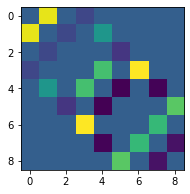

In [3]:
fig, ax = plt.subplots(figsize=(3, 3))
plt.imshow(Theta)
plt.show()

### Create an instance of an Ising Knockoff sampler

In [4]:
iks = Ising_Knockoff_Sampler(Z=Z, Theta=Theta)

### Sample Knockoffs for the Ising data

In [5]:
Z_tilde = iks.sample()

### Visualize the first 15 rows of the results

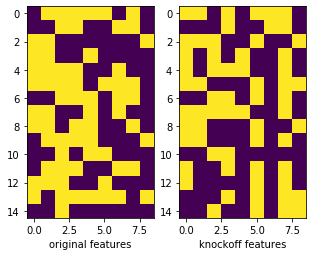

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(5, 10))
ax[0].imshow(Z[:15, :])
ax[0].set_xlabel("original features")
ax[1].set_xlabel("knockoff features")
ax[1].imshow(Z_tilde[:15, :])
plt.show()

### Create a random covariance matrix

In [7]:
A = np.random.uniform(0, 2, size=(50, 50))
Sigma = A.T.dot(A)

### Sample multivariate Gaussian data

In [8]:
Y = np.random.multivariate_normal(mean=[0] * Sigma.shape[0], cov=Sigma, size=1000)

### Create an instance of a Gaussian Knockoff Sampler
#### Note that per default, the 'equi-distant' optimization method will be used

In [9]:
gks = Gaussian_Knockoff_Sampler(cov=Sigma, Y=Y)

### Sample Knockoffs for multivariate Gaussian data

In [10]:
Y_tilde = gks.sample()

0: Knockoffs generated
100: Knockoffs generated
200: Knockoffs generated
300: Knockoffs generated
400: Knockoffs generated
500: Knockoffs generated
600: Knockoffs generated
700: Knockoffs generated
800: Knockoffs generated
900: Knockoffs generated


### Visualize the first 20 rows of the results

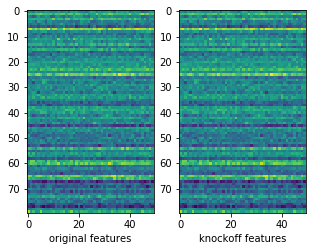

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(5, 10))
ax[0].imshow(Y[:80, :])
ax[1].imshow(Y_tilde[:80, :])
ax[0].set_xlabel("original features")
ax[1].set_xlabel("knockoff features")
plt.show()

### Test the case where the covariance matrix will be estimated

In [15]:
cov_estimator = LedoitWolf()
Sigma_hat = cov_estimator.fit(Y).covariance_

In [17]:
gks_hat = Gaussian_Knockoff_Sampler(cov=Sigma_hat, Y=Y)

In [18]:
Y_tilde_hat = gks_hat.sample()

0: Knockoffs generated
100: Knockoffs generated
200: Knockoffs generated
300: Knockoffs generated
400: Knockoffs generated
500: Knockoffs generated
600: Knockoffs generated
700: Knockoffs generated
800: Knockoffs generated
900: Knockoffs generated


### Visualize original, knockoff, and knockoff data with estimated covariance matrix

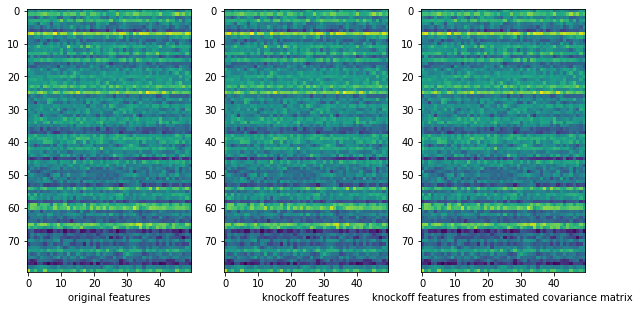

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(10, 15))
ax[0].imshow(Y[:80, :])
ax[1].imshow(Y_tilde[:80, :])
ax[2].imshow(Y_tilde_hat[:80, :])
ax[0].set_xlabel("original features")
ax[1].set_xlabel("knockoff features")
ax[2].set_xlabel("knockoff features from estimated covariance matrix")
plt.show()